"""
File Name           --> LoanPrediction.py

Version             --> 0.1

Created Date        --> 1 Jan 2019

Problem Statement   --> Predict the loan default for people.

Problem Type        --> Binary Classification

Description         --> Training dataset is provided with information for people who have defaulted or otherwise.
                        The goal is to predict the loan default for people in the test dataset based on the given attributes.
                        
Output/Dependant Variable --> Loan Status (0 or 1)

#################################Change History#################################
#Please fill below whenever changes are done.

#1st Change
Changed By          -->
Changed On          --> 
Change Reason       -->
Search String       -->


"""

In [1]:
# To make the story interesting to be heard, We have given the dependant variable the designation of a chief guest
# and all other independant variables are considered to be ordinary guest.
# Goal will be to predict whether our chief guest will pay back our loan based on our understanding
# of ordinary guests loan payment habits and relation to chief guest.

# Gather all the packages for my party.
import pandas as  pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import Imputer

In [2]:
# Shop the food and fuel.
train = pd.read_csv(r'C:\Users\SHANTNU\Documents\GitHub\UseCases\train_u6lujuX_CVtuZ9i.csv')

In [3]:
# Check what's on the Menu
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
# Welcome the chief guest.
train['Loan_Status'].describe()

count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

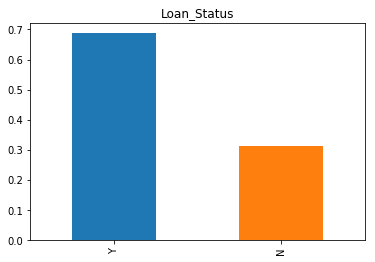

In [5]:
# Get more details about the chief guest so we can understand and overwhelm him.

#----------------For linear regression or continous variable start.-----------------
#sns.distplot(train['Loan_Status']);

# Get the body measures.
#skewness and kurtosis
#print("Skewness: %f" % df_train['SalePrice'].skew())
#print("Kurtosis: %f" % df_train['SalePrice'].kurt())
#----------------For linear regression or continous variable end.-----------------

#----------------For Classification or categorical variable start.-----------------
# For Classification problem.
train['Loan_Status'].value_counts(normalize ='True').plot.bar(title = 'Loan_Status')
#----------------For Classification or categorical variable end.-----------------

In [6]:
#Seperate the other ordinary guest from the chief guest. And arrange a special seat.
#print(train.head())
X = train.iloc[:,:-1].values
#print(X)
Y = train.iloc[:,12]
#print(Y)
print(train.dtypes)
train.shape
train.head(5)
train.sample(1)
#train.info

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y


In [7]:
#################### EDA for regression problems (high level for now)########################
# Histogram for mean, variance & standard deviation
# Data Distribution
# Scatterplots
# Correation matrix for pearson coeffecient.
# Stability test to check if there is a significant change in dataset over period of time.
# Co-variance

In [8]:
############### EDA for classification problems #######################################

# Check how our chief guest is related to other ordinary guest individually.
# Declaring cross tabs for various variables with respect to output variable.
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Loan_Amount_Term=pd.crosstab(train['Loan_Amount_Term'],train['Loan_Status'])

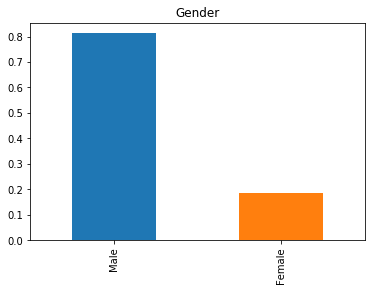

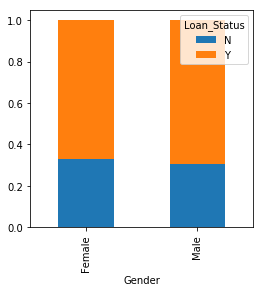

In [9]:
########################### Gender #########################################
# Ratio of gender in dataset
train['Gender'].value_counts(normalize ='True').plot.bar(title = 'Gender')
# Result --> High number of mails. About 80%.
# What does this mean --> we can impute by mode since 80% are males.
# Check what our chief guest thinks about Gender.
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
# Result --> As it turns out, our guest belives in gender equality. Gender rations are almost similar.
# You must be thinking I wrote mails instead of males above. Bugged you.

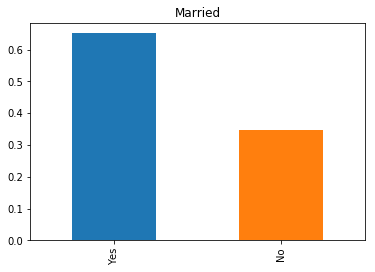

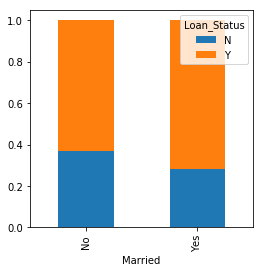

In [10]:
########################### Gender ################################################
#####ratio of married in dataset
train['Married'].value_counts(normalize ='True').plot.bar(title = 'Married')
# Result --> More married people around 60%.
# What does this mean --> we can impute in ratio of 60/40 randomly or if very less missing then impute mode as well. Prefer 60/40.
# Check what our chief guest thinks about Marital status.
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
# Result --> As it turns out, our guest doesn't care about marital status. (Can go for extra-marital as well)

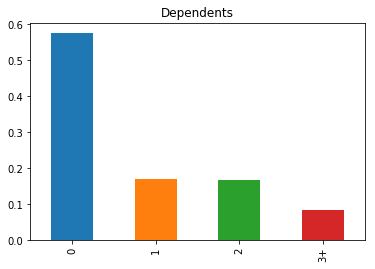

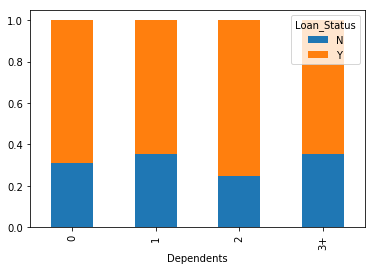

In [11]:
########################### Dependents ###############################################
train['Dependents'].value_counts(normalize ='True').plot.bar(title = 'Dependents')
# Result --> High percentage of data contains 0 dependants and other values equallly distributed.
# What does this mean --> we can impute in ratio of 60/15/15/10 randomly or if very less missing then impute mode as well. Prefer 60/40.
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
# Result --> People with 2 dependants are less defaulters and people with 1 & 3+ are more. But rations are very close to conclude anything.
# What does this mean --> Number of dependant affects less to our chief guest. we will keep in mind.

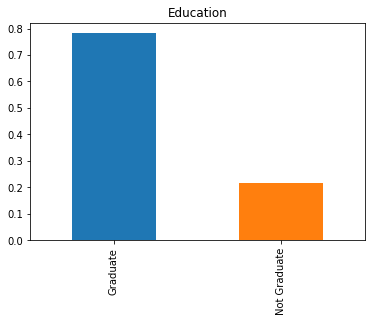

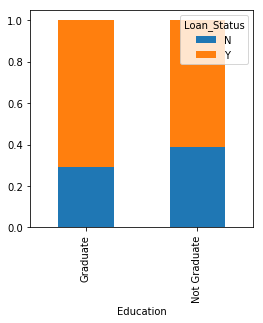

In [12]:
########################### Education #############################################
train['Education'].value_counts(normalize ='True').plot.bar(title = 'Education')
# Result --> More graduate people around 80%.
# What does this mean --> we can impute in ratio of 80/20 randomly or mode as well.
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
# Result --> More no 'Not graduate' people donot pay the loan. 
# What does this mean --> 'Not graduate' might be imp variable. Let's keep this in mind too.

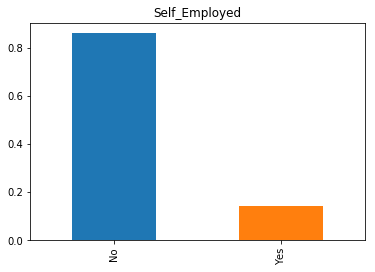

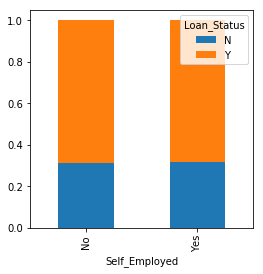

In [13]:
########################### Self_Employed #########################################
train['Self_Employed'].value_counts(normalize ='True').plot.bar(title = 'Self_Employed')
# Result --> Only 10% of people are self-employed.
# What does this mean --> Imputation by mode is a feasible option.
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
# Result --> Both default around 30% of their loans.
# What does this mean --> Our chief guest doesn't give a shit if you are an entrepreneur or salaried

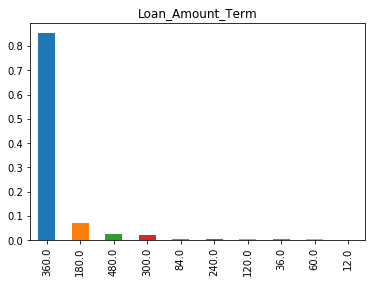

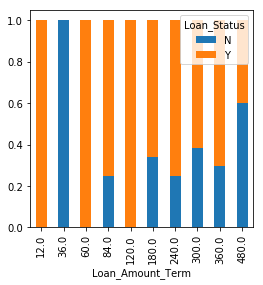

In [14]:
########################### Loan_Amount_Term #########################################
train['Loan_Amount_Term'].value_counts(normalize ='True').plot.bar(title = 'Loan_Amount_Term')
# Result --> Loan term is mostly 90%.
# What does this mean --> Imputation by mode is a perfectly feasible option.
Loan_Amount_Term.div(Loan_Amount_Term.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
# Result --> All People with 36 days have defaulted. People with 12 days term have not at all defaulted.
#            People with 480 days of loan terms default alot.
# What does this mean --> Our chief guest is affected by the number of days you are taking the loan for. 
#                         This shall be an important variable to keep a track of. 

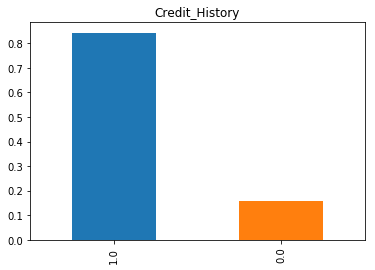

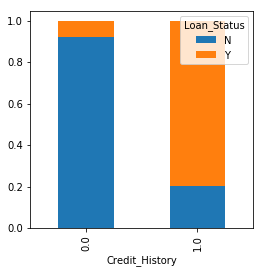

In [15]:
########################### Credit_History #########################################
train['Credit_History'].value_counts(normalize ='True').plot.bar(title = 'Credit_History')
# Result --> Credit history people are around 85%
# What does this mean --> Mode imputation is a perfectly feasible optiion.
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
# Result --> People with no credit history have defaulted 90% of the times. 20% default for people with credit history.
# What does this mean --> Our chief guest is definitely concerned about the credit history of the ordinary people.

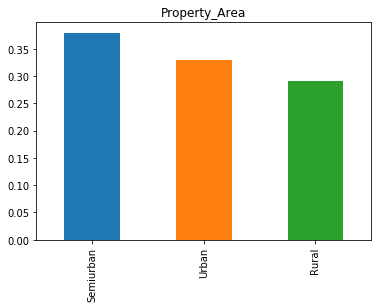

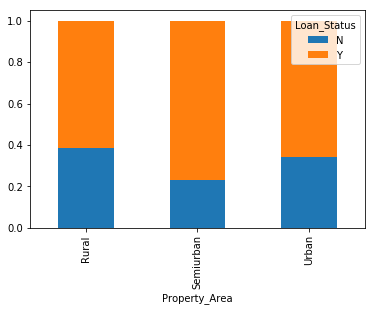

In [16]:
########################### Property_Area #########################################
train['Property_Area'].value_counts(normalize ='True').plot.bar(title = 'Property_Area')
# Result --> SemiUrban --40%        Urban --32%         Rural --28% 
# What does this mean --> we can impute in ratio of 40/32/28 randomly.
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
# Result --> Max default is from Rural Areas. Least is SemiUrban.
# What does this mean --> This also seems to be the variable of interest.

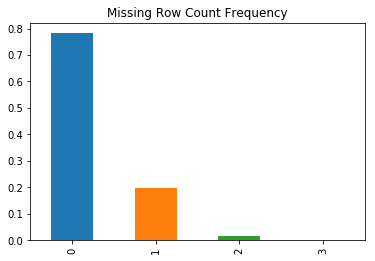

In [17]:
#1. Row wise missing values info
RowMissingCount = train.isnull().sum(axis=1)
RowMissingCount
RowMissingCount.value_counts(normalize ='False').plot.bar(title = 'Missing Row Count Frequency')

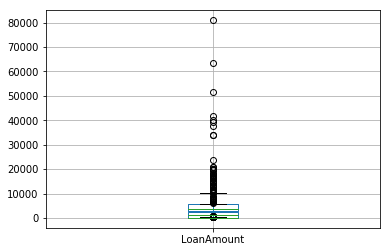

In [18]:
#2. Box Plots on all Columns. (Obviiously Only Continous)
#To create with looping all variables in.
#for i in train.columns:
#    train.boxplot(column=i)
#    plt.show()

train.boxplot(column=['ApplicantIncome'], grid=True)
train.boxplot(column=['CoapplicantIncome'], grid=True)
train.boxplot(column=['LoanAmount'], grid=True)

In [19]:
#3 Count of missing values in each column
columns = train.columns
total_rows = len(train)
count_missing = len(train) - train.count()
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_train = pd.DataFrame({ '# of total': total_rows,
                                    '# of missing': count_missing,
                                 '# of percent': percent_missing})
missing_value_train.sort_values('# of percent', inplace=True, ascending = False)
percent_missing
missing_value_train

,# of total,# of missing,# of percent
Credit_History,614,50,8.143322
Self_Employed,614,32,5.211726
LoanAmount,614,22,3.583062
Dependents,614,15,2.442997
Loan_Amount_Term,614,14,2.280130
Gender,614,13,2.117264
Married,614,3,0.488599
Loan_ID,614,0,0.000000
Education,614,0,0.000000
ApplicantIncome,614,0,0.000000


In [20]:
#code for missing values
train = train.replace(0, np.NaN)
train['Gender']= train['Gender'].fillna(train['Gender'].mode()[0])
train['Married']= train['Married'].fillna(train['Married'].mode()[0])
train['Dependents']= train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed']= train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['LoanAmount']= train['LoanAmount'].fillna(train['LoanAmount'].mean())
#print(train['Gender'])

In [21]:
#4 Count of missing values after imputation
columns = train.columns
total_rows = len(train)
count_missing = len(train) - train.count()
Updated_percent_missing = train.isnull().sum() * 100 / len(train)
updated_missing_value_train = pd.DataFrame({ '# of total': total_rows,
                                    '# of missing': count_missing,
                                 '# of percent': percent_missing})
updated_missing_value_train.sort_values('# of percent', inplace=True, ascending = False)
Updated_percent_missing
updated_missing_value_train

,# of total,# of missing,# of percent
Credit_History,614,139,8.143322
Self_Employed,614,0,5.211726
LoanAmount,614,0,3.583062
Dependents,614,0,2.442997
Loan_Amount_Term,614,14,2.280130
Gender,614,0,2.117264
Married,614,0,0.488599
Loan_ID,614,0,0.000000
Education,614,0,0.000000
ApplicantIncome,614,0,0.000000


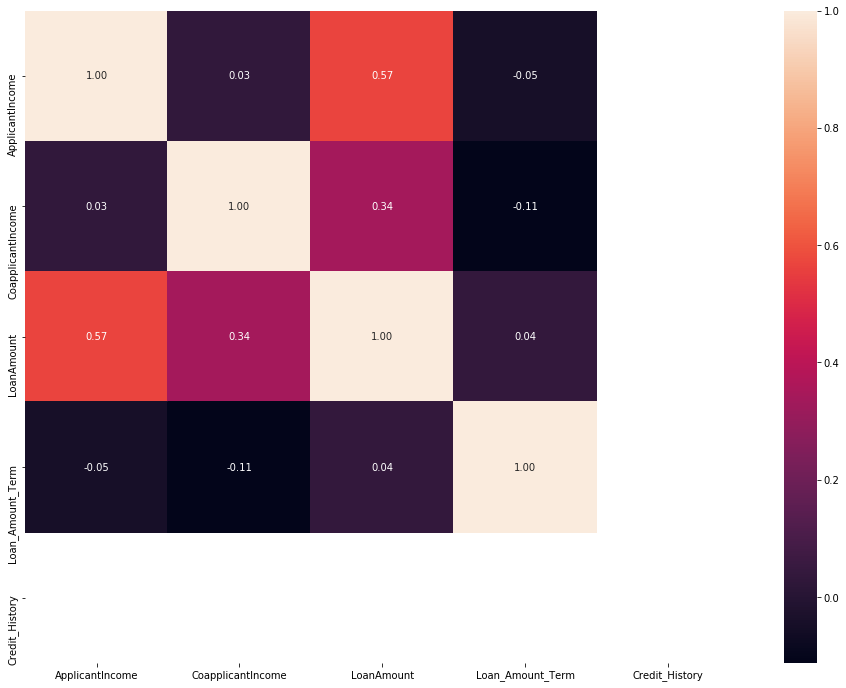

In [22]:
#4. #CORRELATION MATRIX (Pearson Correlation to measure how similar are 2 solutions)
#Pearson correlation coefficient is only used for Continous variable.
plt.figure(figsize=(16,12))
sns.heatmap(train.iloc[:,1:].corr(),annot=True,fmt=".2f")

0       sNo
1       sNo
2      sYes
3       sNo
4       sNo
5      sYes
6       sNo
7       sNo
8       sNo
9       sNo
10      sNo
11      sNo
12      sNo
13      sNo
14      sNo
15      sNo
16      sNo
17      sNo
18      sNo
19      sNo
20      sNo
21      sNo
22      sNo
23      sNo
24      sNo
25     sYes
26      sNo
27      sNo
28      sNo
29      sNo
       ... 
584     sNo
585     sNo
586     sNo
587     sNo
588     sNo
589    sYes
590     sNo
591    sYes
592    sYes
593     sNo
594    sYes
595     sNo
596    sYes
597     sNo
598    sYes
599     sNo
600     sNo
601     sNo
602     sNo
603     sNo
604     sNo
605     sNo
606     sNo
607     sNo
608     sNo
609     sNo
610     sNo
611     sNo
612     sNo
613    sYes
Name: Self_Employed, Length: 614, dtype: object


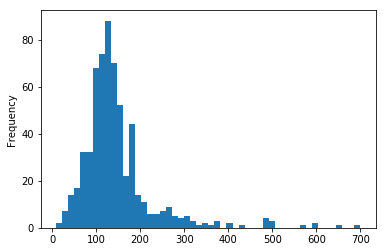

In [23]:
train['Self_Employed']='s'+ train['Self_Employed'].astype(str)
print(train['Self_Employed'])

#code for categorical variables(dummy)
propAreaD = pd.get_dummies(train['Property_Area'])
train = train.drop('Property_Area',axis=1)
train = train.join(propAreaD)
#print(propAreaD)

genderD = pd.get_dummies(train['Gender'])
train = train.drop('Gender',axis=1)
train = train.join(genderD)
#print(genderD)

marriedD =pd.get_dummies(train['Married'])
train = train.drop('Married',axis=1)
train = train.join(marriedD)
#print(marriedD)

educationD = pd.get_dummies(train['Education'])
train = train.drop('Education',axis=1)
train = train.join(educationD)
#print(educationD)

selfEmpD = pd.get_dummies(train['Self_Employed'])
train = train.drop('Self_Employed',axis=1)
train = train.join(selfEmpD)
#print(selfEmpD)



train.head(5)

import matplotlib
import matplotlib.pyplot as plt
train['LoanAmount'].plot(kind = 'hist',bins =50)